In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings('ignore')

In [3]:
train_data_df = pd.read_csv("/data/datasets/ml/titanic/train.csv")
train = train_data_df
train_data = train_data_df.copy()

In [4]:
print(len(train_data_df))
train_data_df.tail()

891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train_data_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


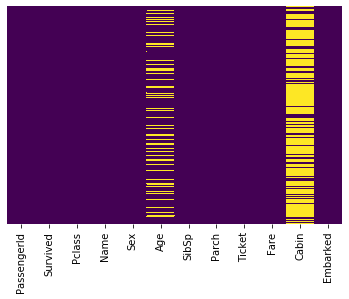

In [6]:
sns.heatmap(train_data_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
train_data_df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

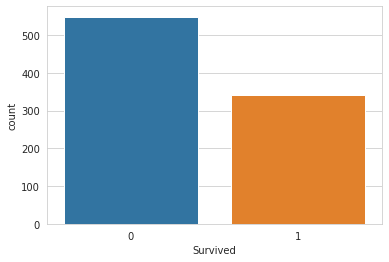

In [8]:
sns.set_style('whitegrid')
# sns.countplot(x='Survived',data=train,palette='RdBu_r')
sns.countplot(x='Survived',data=train_data_df)

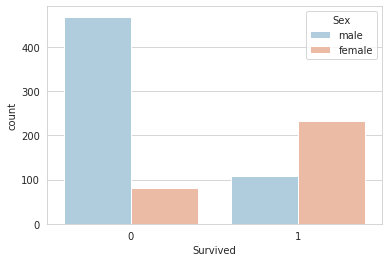

In [9]:
sns.countplot(x='Survived',hue='Sex',data=train_data_df,palette='RdBu_r')

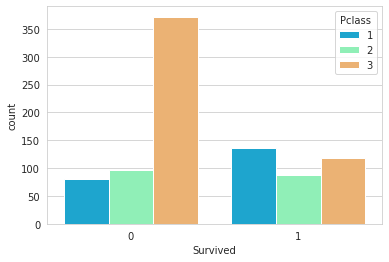

In [10]:
sns.countplot(x='Survived',hue='Pclass',data=train_data_df,palette='rainbow')

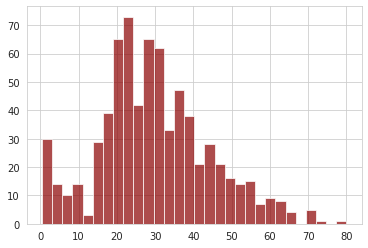

In [11]:
train_data_df.Age.hist(bins=30,color='darkred',alpha=0.7)

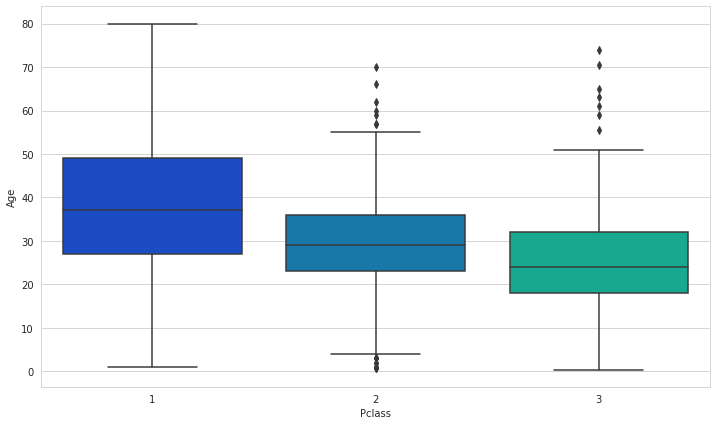

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train_data_df,palette='winter')

In [13]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [14]:
train_data_df['Age'] = train_data_df[['Age','Pclass']].apply(impute_age,axis=1)

In [15]:
train_data_df['Embarked'] = train_data_df['Embarked'].fillna('S')

In [16]:
train_data_df.drop('Cabin',axis=1,inplace=True)

In [17]:
train_data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


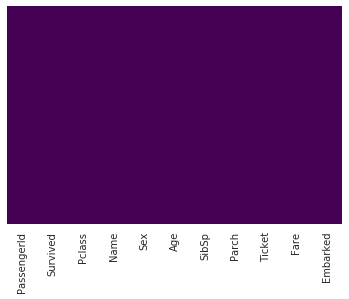

In [18]:
sns.heatmap(train_data_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
print(len(train_data_df))
train_data_df.dropna(inplace=True)
print(len(train_data_df))

891
891


In [20]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


In [21]:
Sex = pd.get_dummies(train_data_df['Sex'],drop_first=False)
Sex[0:4]

,female,male
0,0,1
1,1,0
2,1,0
3,1,0


In [22]:
Sex = pd.get_dummies(train_data_df['Sex'],drop_first=True)
Sex[0:4]

,male
0,1
1,0
2,0
3,0


In [23]:
Embarked = pd.get_dummies(train_data_df['Embarked'],drop_first=True)

In [24]:
train_data_df.drop(['Sex','Embarked','Name','Ticket', 'PassengerId'],axis=1,inplace=True)
train_data_df = pd.concat([train_data_df, Sex, Embarked],axis=1)

In [25]:
train_data_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [26]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [27]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
train_data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [29]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)

In [30]:
train_data['Embarked'].fillna('S', inplace=True)

In [31]:
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1,inplace=True)

In [32]:
print(len(train_data))
train_data.dropna(inplace=True)
print(len(train_data))

891
891


In [33]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [34]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [35]:
sex_dict = {
    'male': 0,
    'female': 1,
}
emb_dict = {
    'S': 0,
    'C': 1,
    'Q': 2,
}

In [36]:
train_data["Sex"].replace(sex_dict, inplace=True)
train_data["Embarked"].replace(emb_dict, inplace=True)

In [37]:
train_data.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,0,27.0,0,0,13.00,0
887,1,1,1,19.0,0,0,30.00,0
888,0,3,1,24.0,1,2,23.45,0
889,1,1,0,26.0,0,0,30.00,1
890,0,3,0,32.0,0,0,7.75,2


In [41]:
X, x, Y, y = train_test_split(train_data.drop('Survived', axis=1), train_data['Survived'])

In [53]:
X

<bound method NDFrame.describe of      Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
221       2    0  27.0      0      0   13.0000         0
289       3    1  22.0      0      0    7.7500         2
779       1    1  43.0      0      1  211.3375         0
431       3    1  24.0      1      0   16.1000         0
338       3    0  45.0      0      0    8.0500         0
..      ...  ...   ...    ...    ...       ...       ...
716       1    1  38.0      0      0  227.5250         1
122       2    0  32.5      1      0   30.0708         1
415       3    1  24.0      0      0    8.0500         0
92        1    0  46.0      1      0   61.1750         0
176       3    0  24.0      3      1   25.4667         0

[668 rows x 7 columns]>

In [46]:
y

593    0
127    1
64     0
233    1
564    0
      ..
268    1
859    0
777    1
721    0
857    1
Name: Survived, Length: 223, dtype: int64

In [66]:
a = X.describe()

In [74]:
b = a.T
b

,count,mean,std,min,25%,50%,75%,max
Pclass,668.0,2.300898,0.839897,1.00,2.0000,3.0,3.0000,3.0000
Sex,668.0,0.345808,0.475988,0.00,0.0000,0.0,1.0000,1.0000
Age,668.0,28.952350,13.474285,0.42,22.0000,25.5,37.0000,74.0000
SibSp,668.0,0.541916,1.112709,0.00,0.0000,0.0,1.0000,8.0000
Parch,668.0,0.390719,0.807594,0.00,0.0000,0.0,0.0000,6.0000
Fare,668.0,33.622130,51.086387,0.00,7.8958,14.5,32.3656,512.3292
Embarked,668.0,0.356287,0.632934,0.00,0.0000,0.0,1.0000,2.0000


In [86]:
c = b[1:2]['max']

1.0